<a href="https://colab.research.google.com/github/Fares-mohamedd/Library-system/blob/master/Fares_ECG_Heartbeat_Categorization_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.linear_model import LogisticRegression

Get Data From **Kaggle**

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 93% 92.0M/98.8M [00:00<00:00, 225MB/s]
100% 98.8M/98.8M [00:00<00:00, 227MB/s]


In [7]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


Data **Obtainig**

In [8]:
df=pd.read_csv('mitbih_train.csv')

In [9]:
new_column_names = [f'col_{i}_train' for i in range(len(df.columns))]
df.columns = new_column_names
df.isnull().sum()

,0
col_0_train,0
col_1_train,0
col_2_train,0
col_3_train,0
col_4_train,0
...,...
col_183_train,0
col_184_train,0
col_185_train,0
col_186_train,0


In [10]:
X_train=df.iloc[:,:-1]
Y_train=df.iloc[:,-1]
X_train.info()
print(Y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 187 entries, col_0_train to col_186_train
dtypes: float64(187)
memory usage: 124.9 MB
<class 'pandas.core.series.Series'>
RangeIndex: 87553 entries, 0 to 87552
Series name: col_187_train
Non-Null Count  Dtype  
--------------  -----  
87553 non-null  float64
dtypes: float64(1)
memory usage: 684.1 KB
None


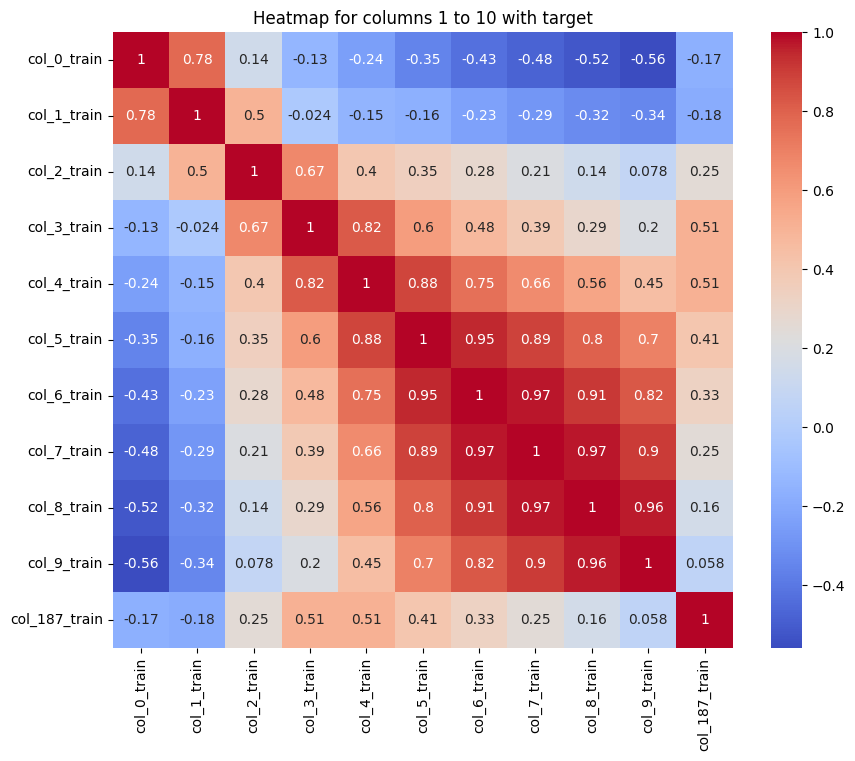

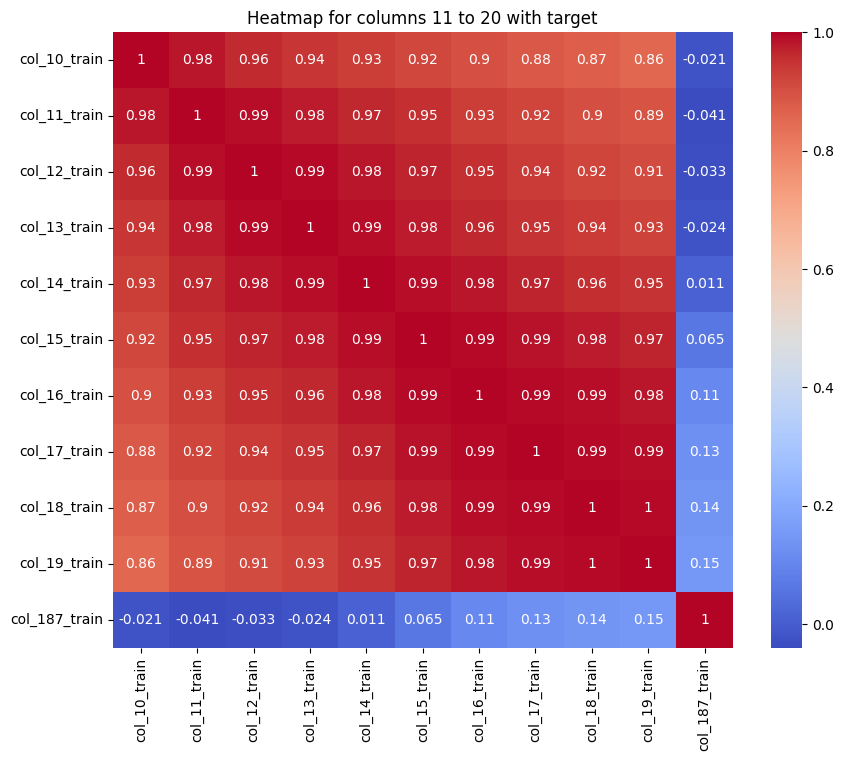

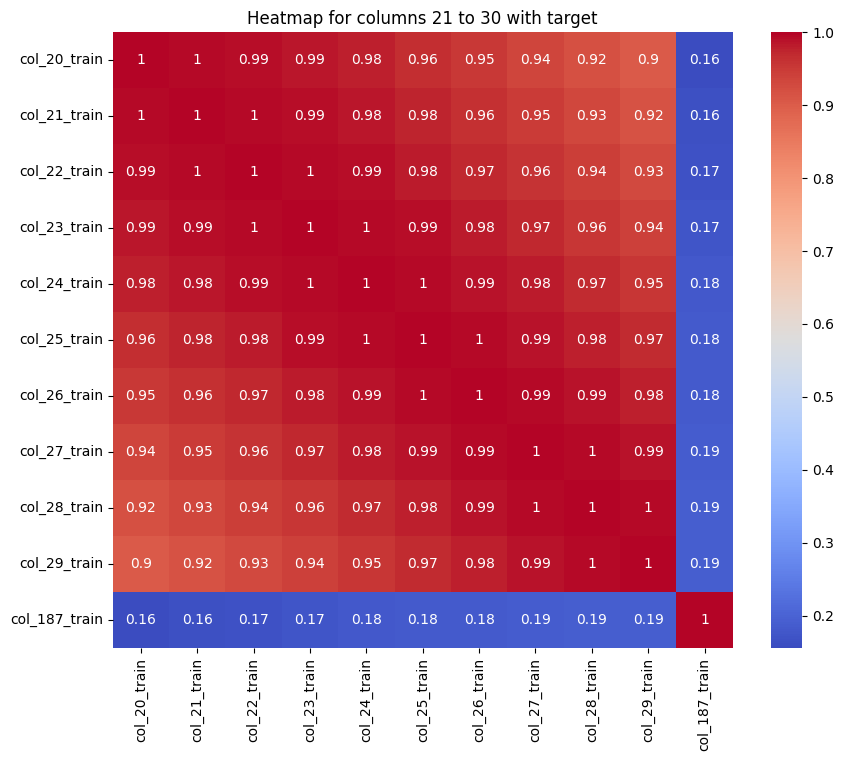

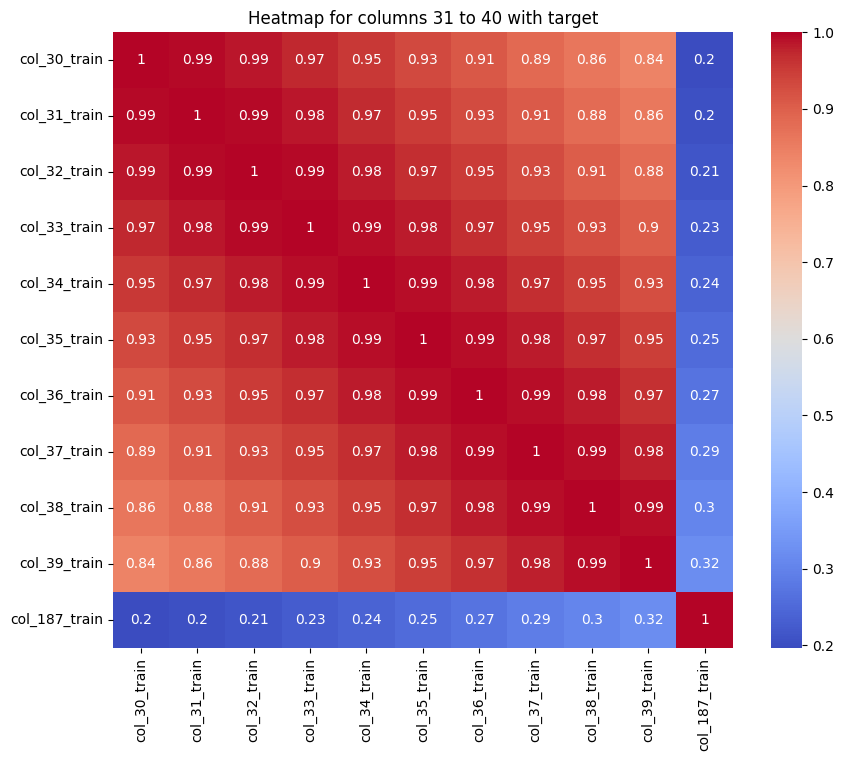

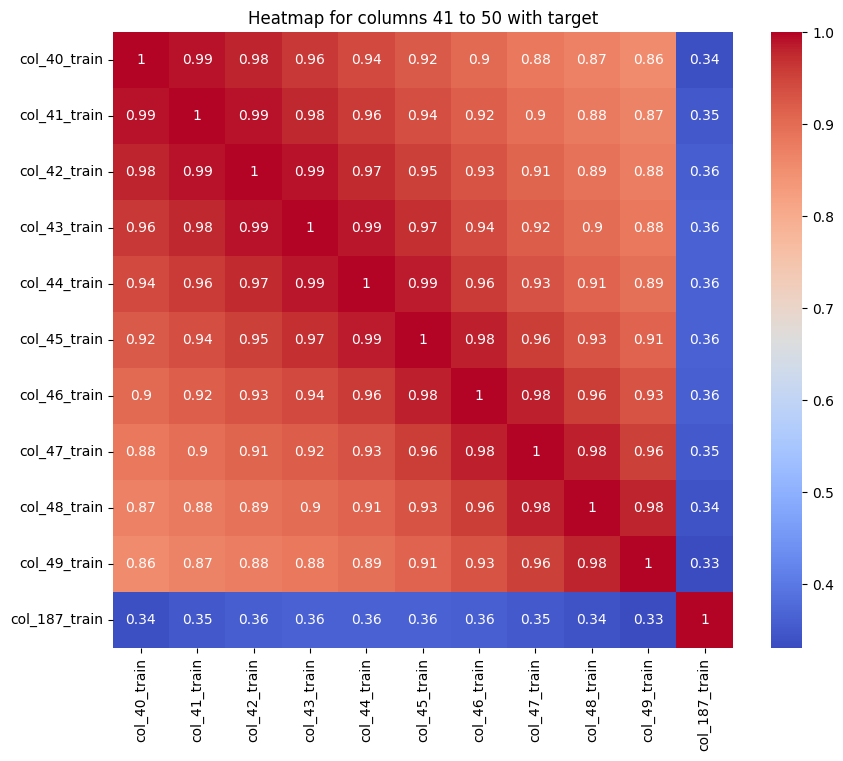

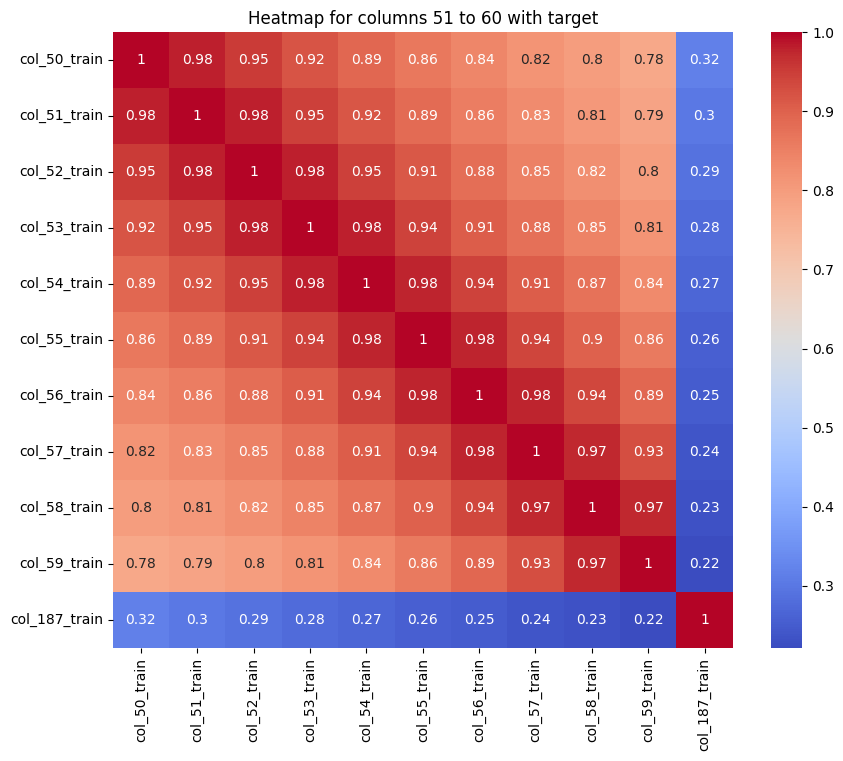

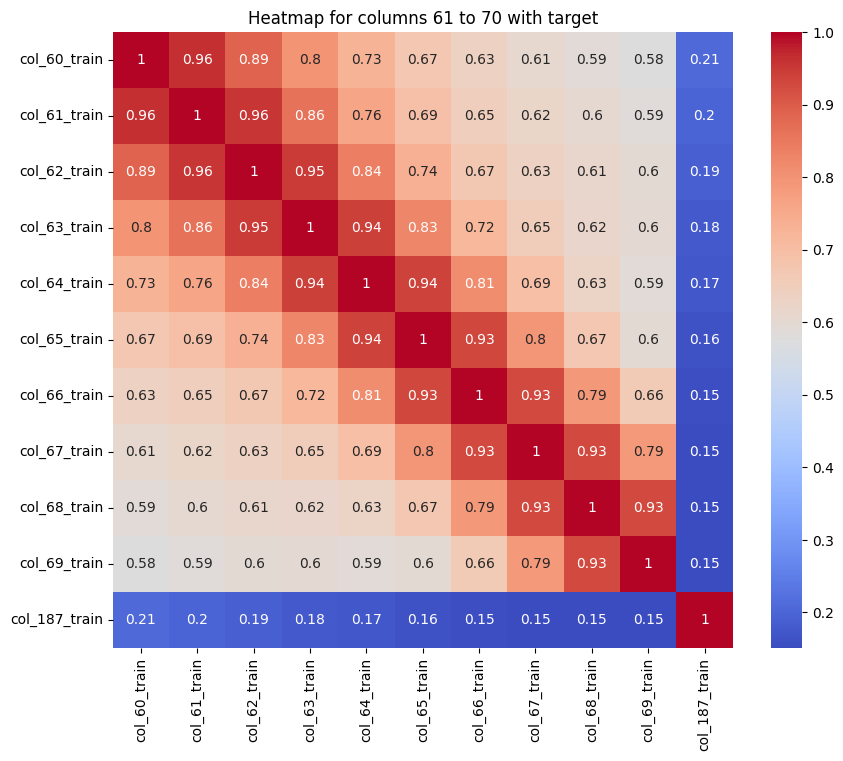

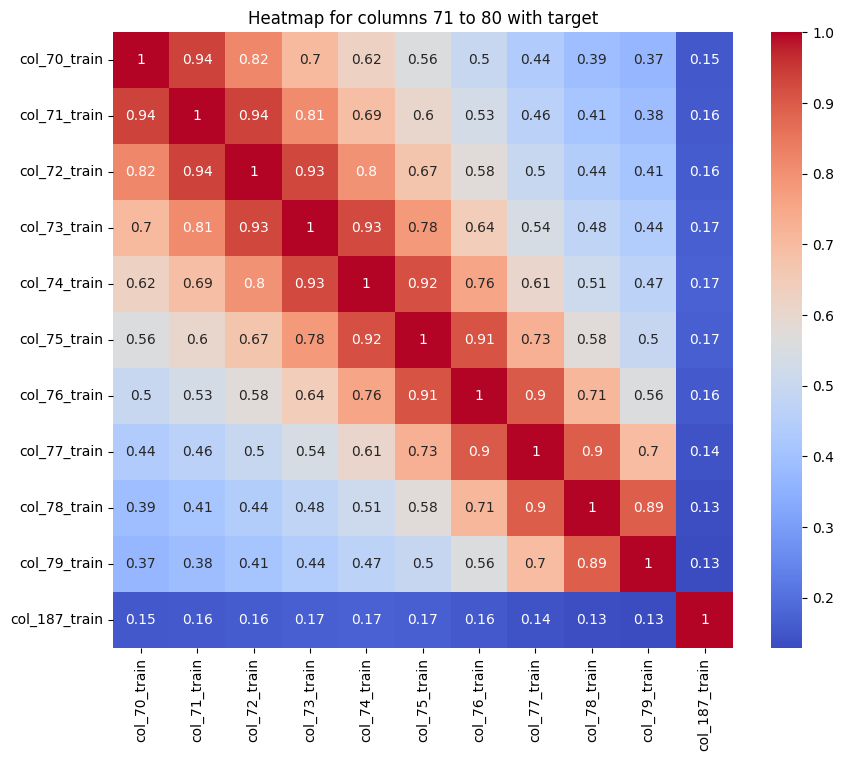

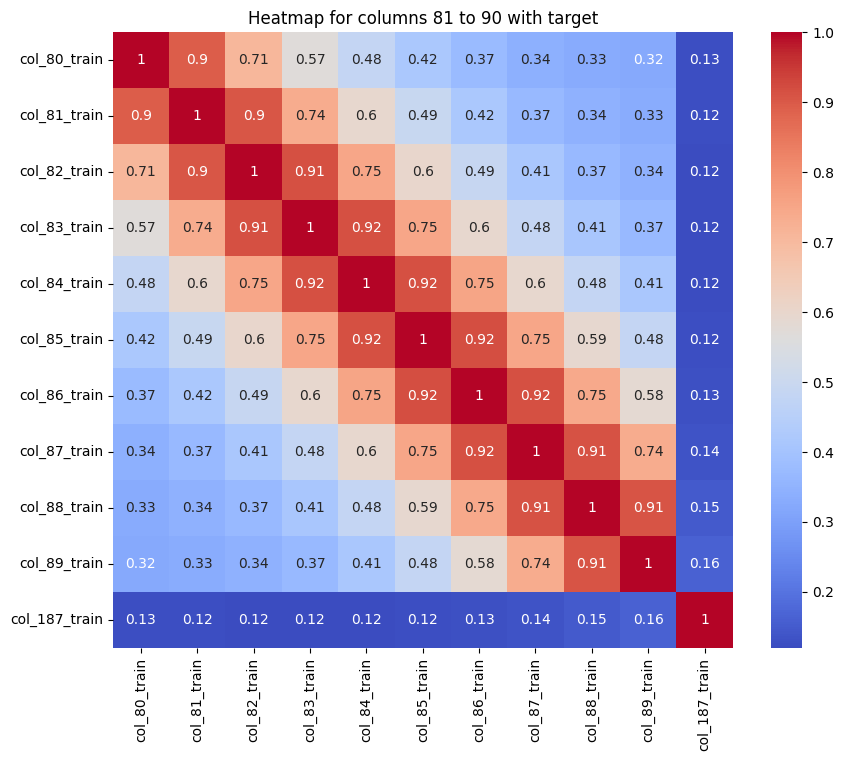

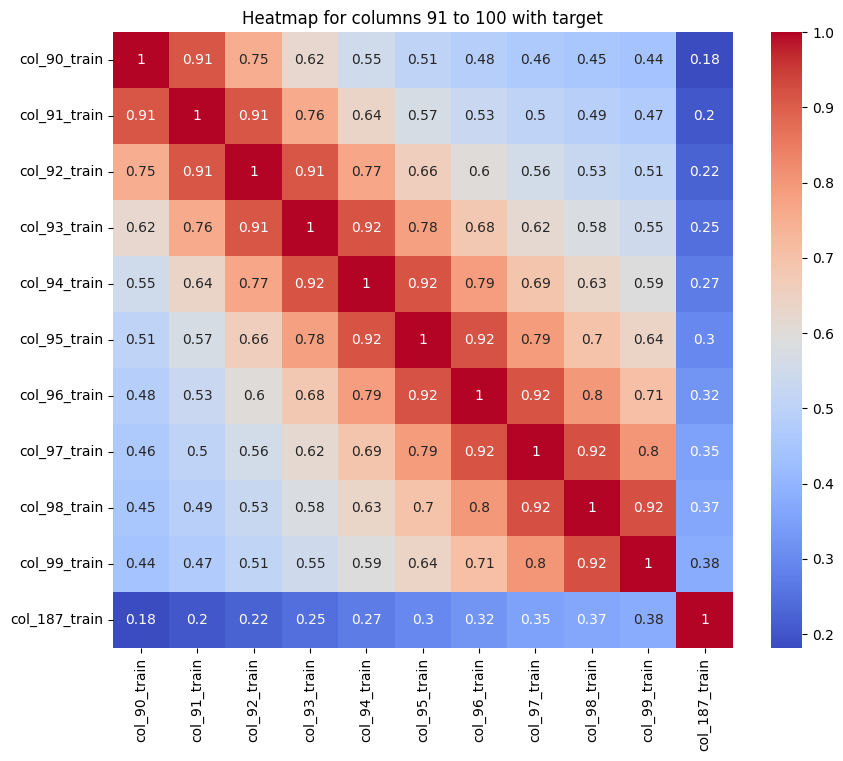

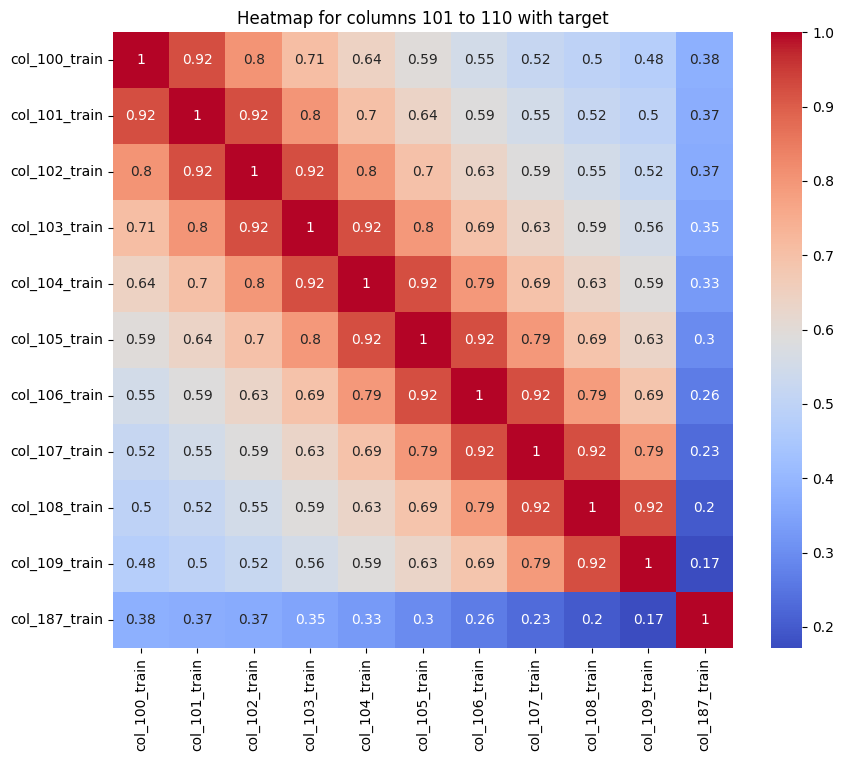

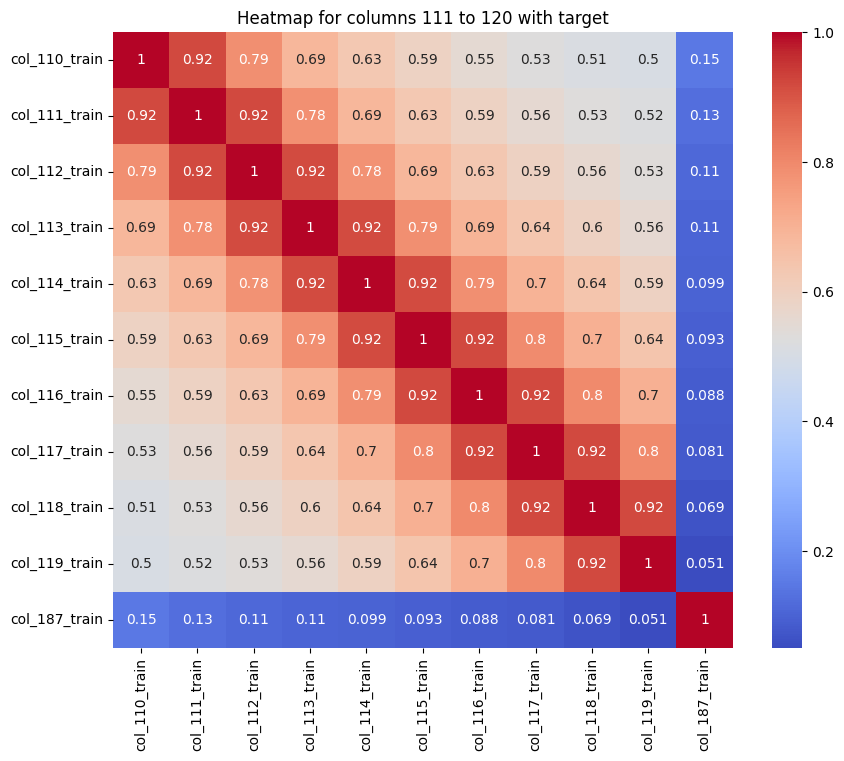

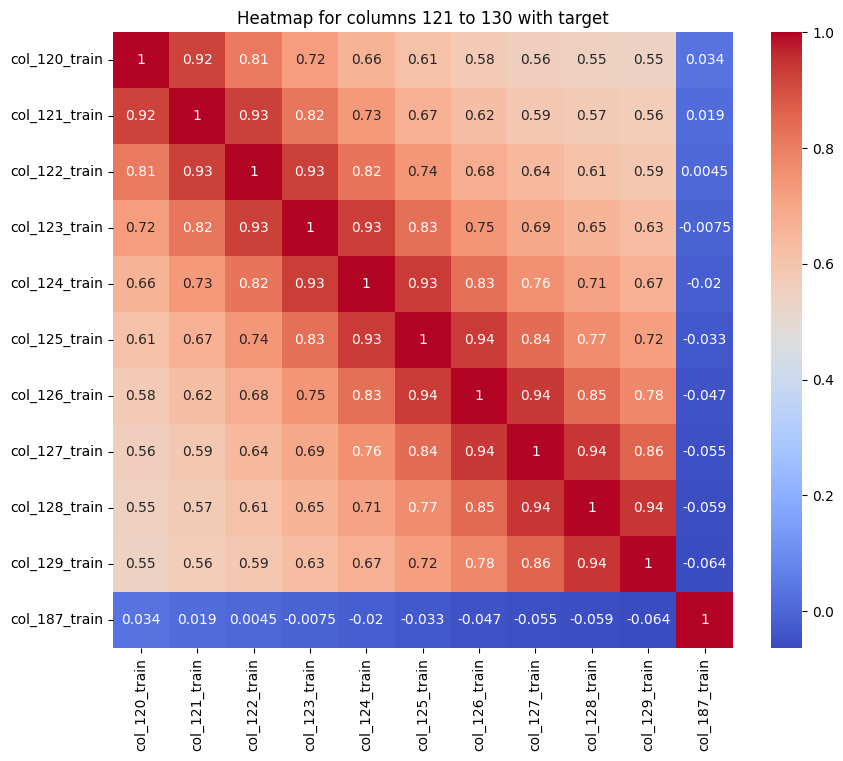

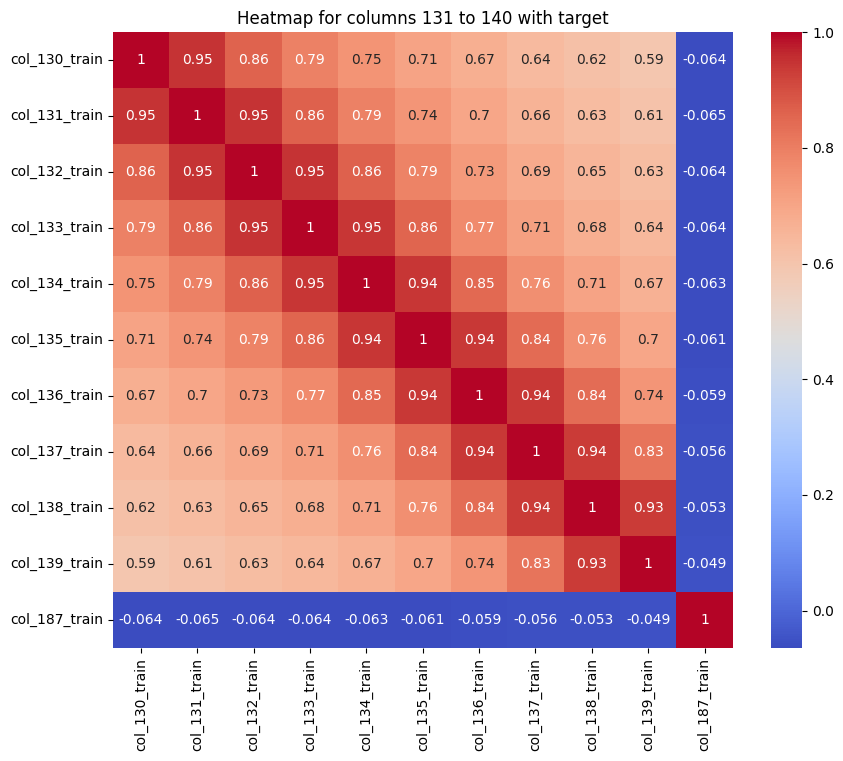

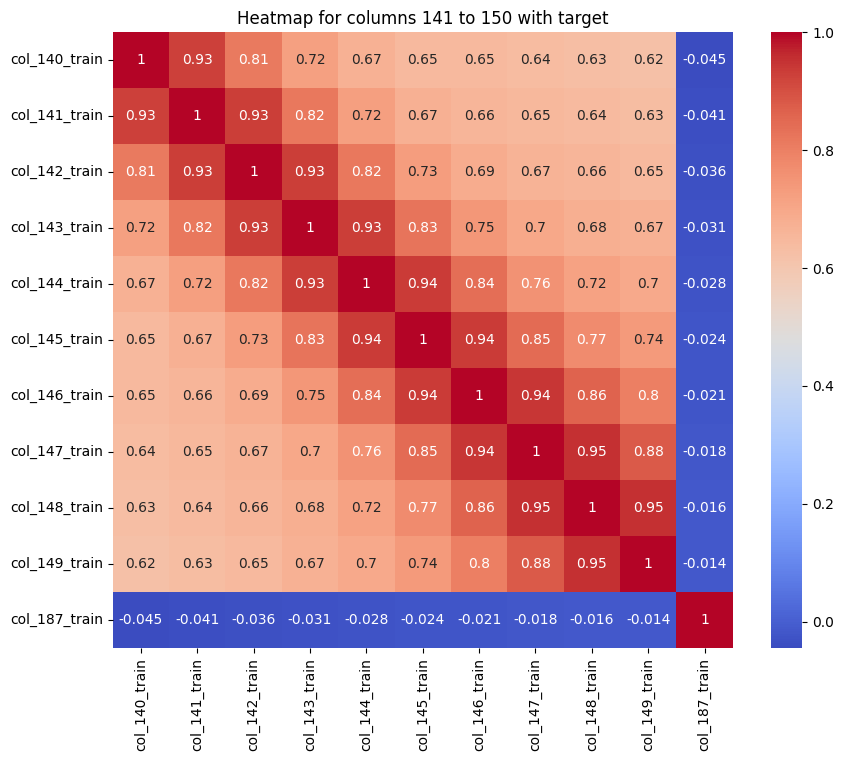

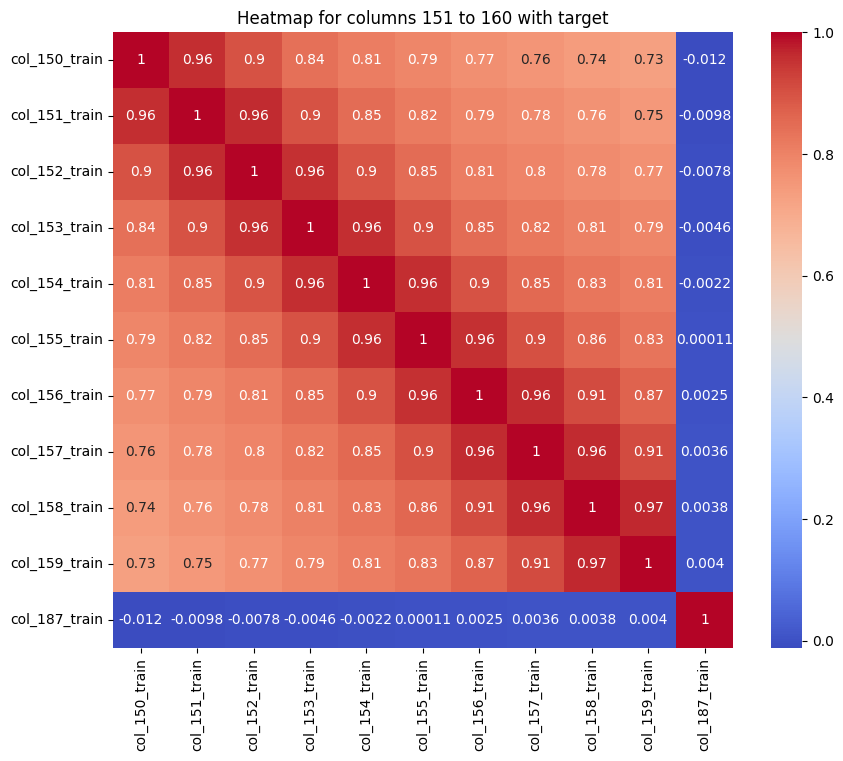

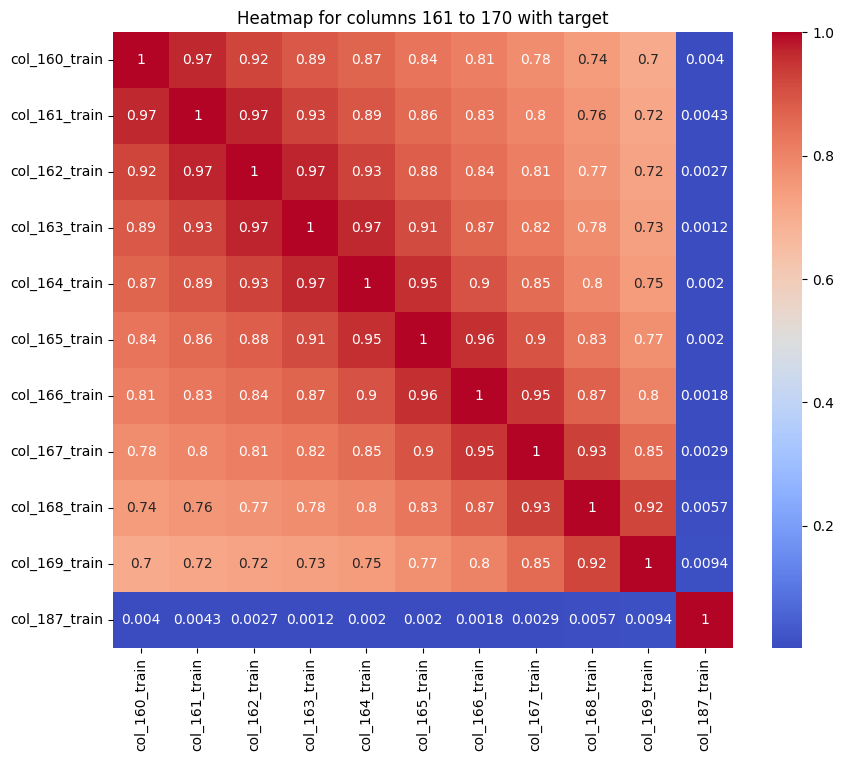

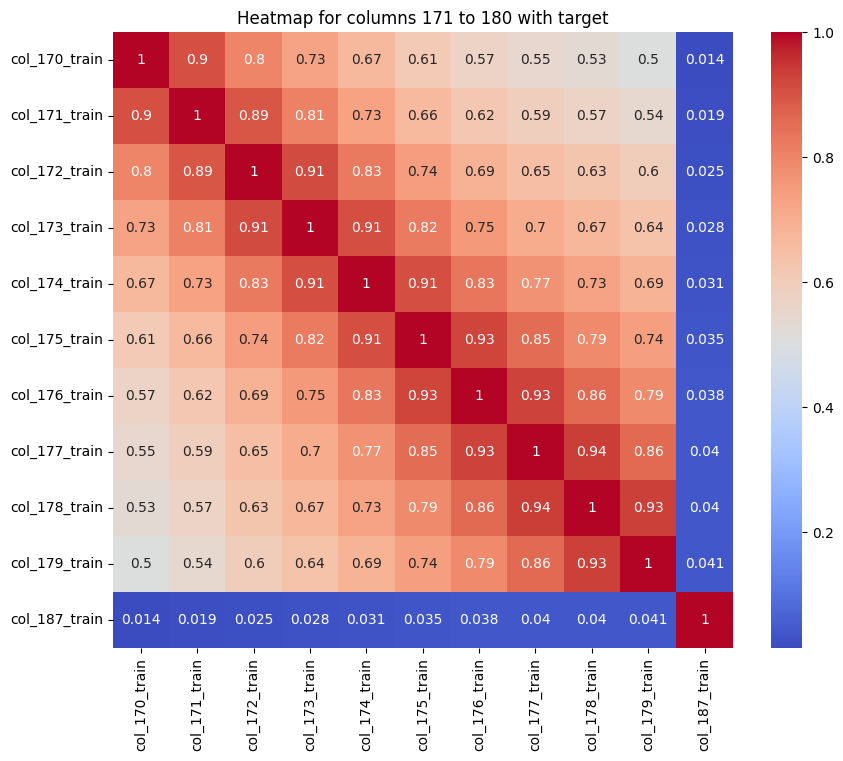

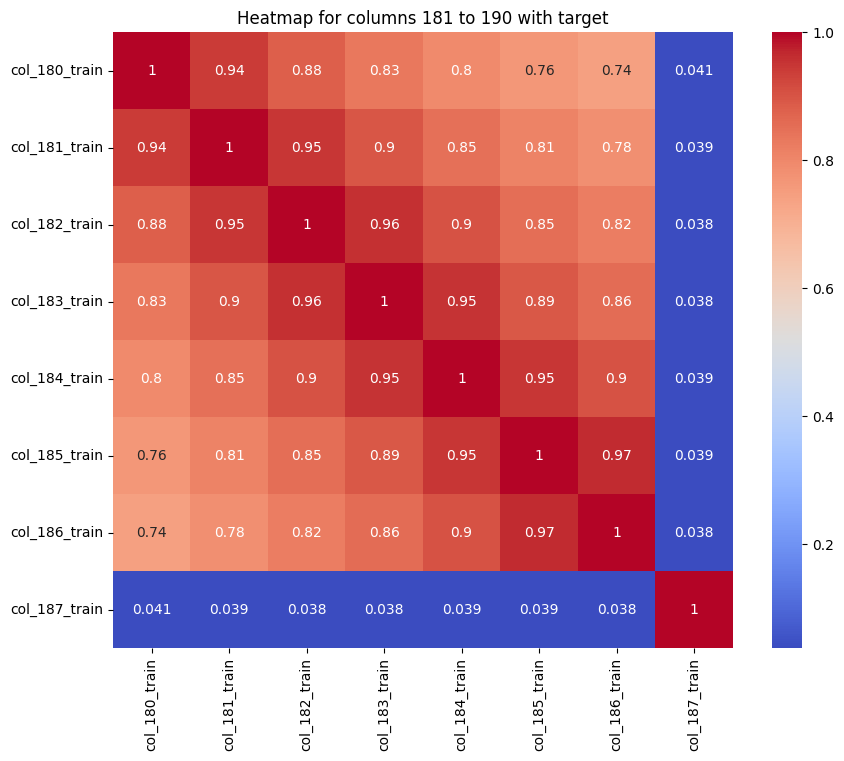

In [11]:
target = 'col_187_train'
def create_heatmaps_with_target(df, target, step=10):
    num_columns = df.shape[1]
    for i in range(0, num_columns, step):
        subset_columns = df.columns[i:i+step].tolist()
        if target not in subset_columns:
            subset_columns.append(target)
        subset = df[subset_columns]
        plt.figure(figsize=(10, 8))
        sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap for columns {i+1} to {i+step} with target')
        plt.show()
create_heatmaps_with_target(df, target)

Data **Cleaning**

In [12]:
target = 'col_187_train'  # Replace with your target column name

# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlations with the target variable
target_corr = corr_matrix[target].drop(target)
significant_corr = target_corr[abs(target_corr) >= 0.05]
# Display the correlation values
print(significant_corr)
significant_corr.info()

col_0_train     -0.166173
col_1_train     -0.183439
col_2_train      0.252183
col_3_train      0.508487
col_4_train      0.508452
                   ...   
col_134_train   -0.062865
col_135_train   -0.061071
col_136_train   -0.058764
col_137_train   -0.056260
col_138_train   -0.053149
Name: col_187_train, Length: 127, dtype: float64
<class 'pandas.core.series.Series'>
Index: 127 entries, col_0_train to col_138_train
Series name: col_187_train
Non-Null Count  Dtype  
--------------  -----  
127 non-null    float64
dtypes: float64(1)
memory usage: 2.0+ KB


In [13]:
X=significant_corr.index
X=df[X]
Y=target
Y=df[Y]
Y

,col_187_train
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87548,4.0
87549,4.0
87550,4.0
87551,4.0


Applying **ML Algorithms**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

90.8665194548085
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     21828
         1.0       0.85      0.26      0.39       631
         2.0       0.64      0.28      0.39      1715
         3.0       0.58      0.15      0.24       207
         4.0       0.95      0.89      0.92      1885

    accuracy                           0.91     26266
   macro avg       0.79      0.51      0.58     26266
weighted avg       0.90      0.91      0.89     26266



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

95.27145359019265


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model=SVC()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

96.84382852356659
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     21828
         1.0       0.95      0.59      0.73       631
         2.0       0.95      0.86      0.90      1715
         3.0       0.82      0.45      0.58       207
         4.0       0.99      0.93      0.96      1885

    accuracy                           0.97     26266
   macro avg       0.94      0.76      0.83     26266
weighted avg       0.97      0.97      0.97     26266



In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

97.49866747887003
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     21828
         1.0       0.98      0.59      0.74       631
         2.0       0.97      0.89      0.93      1715
         3.0       0.93      0.62      0.74       207
         4.0       0.99      0.96      0.97      1885

    accuracy                           0.97     26266
   macro avg       0.97      0.81      0.87     26266
weighted avg       0.97      0.97      0.97     26266



In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

97.40348739815732
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     21828
         1.0       0.92      0.66      0.77       631
         2.0       0.92      0.89      0.91      1715
         3.0       0.84      0.68      0.75       207
         4.0       0.99      0.96      0.97      1885

    accuracy                           0.97     26266
   macro avg       0.93      0.84      0.88     26266
weighted avg       0.97      0.97      0.97     26266



In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred)*100)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     21828
         1.0       0.92      0.66      0.77       631
         2.0       0.92      0.89      0.91      1715
         3.0       0.84      0.68      0.75       207
         4.0       0.99      0.96      0.97      1885

    accuracy                           0.97     26266
   macro avg       0.93      0.84      0.88     26266
weighted avg       0.97      0.97      0.97     26266

97.40348739815732


In [45]:
from sklearn.preprocessing import Normalizer
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
normalizer=Normalizer()
X_train_scaled=normalizer.fit_transform(X_train)
X_test_scaled=normalizer.transform(X_test)
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test,y_pred))

97.40348739815732
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     21828
         1.0       0.92      0.66      0.77       631
         2.0       0.92      0.89      0.91      1715
         3.0       0.84      0.68      0.75       207
         4.0       0.99      0.96      0.97      1885

    accuracy                           0.97     26266
   macro avg       0.93      0.84      0.88     26266
weighted avg       0.97      0.97      0.97     26266



Apply ML Algorithms with handling inbalanced data by **SMOTE**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)

# Train a model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     21828
         1.0       0.89      0.76      0.82       631
         2.0       0.93      0.94      0.94      1715
         3.0       0.86      0.72      0.78       207
         4.0       0.99      0.97      0.98      1885

    accuracy                           0.98     26266
   macro avg       0.93      0.88      0.90     26266
weighted avg       0.98      0.98      0.98     26266



In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)

# Train a model
model = LogisticRegression()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

62.990177415670445
              precision    recall  f1-score   support

         0.0       0.97      0.59      0.73     21828
         1.0       0.11      0.71      0.20       631
         2.0       0.29      0.77      0.42      1715
         3.0       0.08      0.83      0.15       207
         4.0       0.72      0.91      0.80      1885

    accuracy                           0.63     26266
   macro avg       0.44      0.76      0.46     26266
weighted avg       0.88      0.63      0.70     26266



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)

# Train a model
model = DecisionTreeClassifier()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

93.60389857610599
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96     21828
         1.0       0.45      0.71      0.55       631
         2.0       0.79      0.88      0.83      1715
         3.0       0.46      0.69      0.55       207
         4.0       0.92      0.96      0.93      1885

    accuracy                           0.94     26266
   macro avg       0.72      0.84      0.77     26266
weighted avg       0.95      0.94      0.94     26266



In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)
# Train a model
model = KNeighborsClassifier()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

95.22576715145054
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     21828
         1.0       0.52      0.83      0.64       631
         2.0       0.83      0.94      0.88      1715
         3.0       0.47      0.82      0.60       207
         4.0       0.96      0.99      0.97      1885

    accuracy                           0.95     26266
   macro avg       0.75      0.90      0.81     26266
weighted avg       0.96      0.95      0.96     26266



In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)
# Train a model
model = KNeighborsClassifier()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

95.22576715145054
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     21828
         1.0       0.52      0.83      0.64       631
         2.0       0.83      0.94      0.88      1715
         3.0       0.47      0.82      0.60       207
         4.0       0.96      0.99      0.97      1885

    accuracy                           0.95     26266
   macro avg       0.75      0.90      0.81     26266
weighted avg       0.96      0.95      0.96     26266



In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)
Normalizer=Normalizer()
X_train_scaled=Normalizer.fit_transform(X_train_resampled)
X_test_scaled=Normalizer.transform(X_test)
# Train a model
model = KNeighborsClassifier()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

95.22576715145054
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     21828
         1.0       0.52      0.83      0.64       631
         2.0       0.83      0.94      0.88      1715
         3.0       0.47      0.82      0.60       207
         4.0       0.96      0.99      0.97      1885

    accuracy                           0.95     26266
   macro avg       0.75      0.90      0.81     26266
weighted avg       0.96      0.95      0.96     26266



In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
from collections import Counter
# Apply SMOTE
smote = SMOTE(sampling_strategy={3: Counter(Y_train)[3]*2}, random_state=42)  # Doubling the class 3 samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,Y_train)
# Train a model
model = SVC()
model.fit(X_resampled,Y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)
print(classification_report(Y_test, y_pred))

94.01507652478489
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97     21828
         1.0       0.43      0.85      0.57       631
         2.0       0.87      0.94      0.90      1715
         3.0       0.32      0.87      0.46       207
         4.0       0.98      0.98      0.98      1885

    accuracy                           0.94     26266
   macro avg       0.72      0.92      0.78     26266
weighted avg       0.96      0.94      0.95     26266

